# DS4A Project - Airlines Quarterly Revenue Prediction 

Group members: Angela Guan, Sruthi Machina, Sherry Shi, Xinyue(Katherine) Zhang. 

**Objective**: Provide solutions for airline companies for forecast quarterly revenue, and understand the casual relationship between airline companies' revenue and a few of explanatory factors. 

In [0]:
https://drive.google.com/open?id=1Box54gYbxqrW9V3kZ6WlqwKVpPQc1eA4

SyntaxError: ignored

In [0]:
# Gets datasets and imports them into Colab 
%%capture 
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QqQZ14Z7agy2sZQZUCtzhrnc_pnDn0z5' -O 'flight_traffic.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IfKvqwJe8sBqM81oMhqwL5JUU0hLZ8RK' -O 'fares.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CyC7RcxD2zmlrsSJcNfw9-sAHTp4HNm0' -O 'events_US.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IJ8-Uqe_62nzkdB812mPVquiTPXFFgj9' -O 'airlines.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Box54gYbxqrW9V3kZ6WlqwKVpPQc1eA4' -O 'fares_by_route.csv'


In [0]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


def load_data():
  '''
  Loads the data and returns python dataframe
  '''
  airlines = pd.read_csv('airlines.csv')
  events = pd.read_csv('events_US.csv', encoding='latin-1')
  fares = pd.read_csv('fares.csv')
  flight = pd.read_csv('flight_traffic.csv')
  fares_by_route = pd.read_csv('fares_by_route.csv')

  return airlines, events, fares, flight, fares_by_route

airlines, events, fares, flight, fares_by_route = load_data()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Event 1: NBA All Star Game 

**Date**: Feb 19, 2017

**Flight destination**: LAX 

**Author:** Katherine Zhang 


In [0]:
events[events['event_name'] == 'NBA All Star Game']

,date,city,state,event_name
113,19/2/2017,New Orleans,LA,NBA All Star Game


**Some data exploratory questions to start with:**

> 1. How does traffic volume vary prior to the start date of the event?
> 2. How does increase in fare relate to the spike of traffic volume? 






### **1)** **Flight volume at the month of the event**

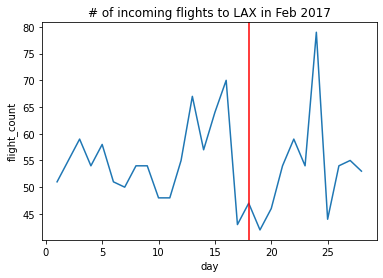

In [0]:
# Converts date to standard datetime format
events['clean_date'] = pd.to_datetime(events["date"])

# Select all flights to LAX in Feb 2017
la_feb_flight = flight[(flight['year'] == 2017) & 
                        (flight['month'] == 2) & 
                        (flight['destination_airport'] == 'LAX')]

plot_data = la_feb_flight.groupby(['day']).count().reset_index().rename(columns={"year": "flight_count"})

sns.lineplot(x = 'day', y = 'flight_count', data = plot_data)
plt.axvline(18, color = 'red')
plt.title('# of incoming flights to LAX in Feb 2017');

In [0]:
len(la_feb_flight)

1525

There're 1525 incoming flights to LAX in Feb 2017. 

The line graph above shows the number of incoming flights arrived at LAX in Feb 2017. The red vertical line marks the date of the NBA all star game. We observe that prior to the event start date, there are two peaks of the traffic volume - Feb 13 and 16.

Next, let's further investigate how fares changed in response to the surge of flight demand. 

### **2)** **Fare at the month of the event**

In [0]:
# Selects all flights to LAX in quarter 1 (Jan, Feb, March)
la_feb_fares = fares[(fares['destination_airport'] == 'LAX') &
                     (fares['quarter'] == 1)]

In [0]:
flight

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,1829.0,7.0,1856,1836.0,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,1456.0,9.0,1508,1505.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,1455.0,7.0,1508,1502.0,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,1508.0,5.0,1508,1513.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,1449.0,8.0,1508,1457.0,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567668,2017,12,17,UA,IAH,LGA,1624,1619.0,14.0,1633.0,2014.0,8.0,2054,2022.0,0,0,210.0,183.0,1416,NaN,NaN,NaN,NaN,NaN
567669,2017,12,17,UA,IAH,PBI,2000,2000.0,20.0,2020.0,2317.0,4.0,2334,2321.0,0,0,154.0,141.0,956,NaN,NaN,NaN,NaN,NaN
567670,2017,12,17,UA,CLE,ORD,740,733.0,28.0,801.0,759.0,4.0,815,803.0,0,0,95.0,90.0,316,NaN,NaN,NaN,NaN,NaN
567671,2017,12,17,UA,DEN,MSP,1253,1246.0,12.0,1258.0,1525.0,6.0,1548,1531.0,0,0,115.0,105.0,680,NaN,NaN,NaN,NaN,NaN


In [0]:
# Joins fare table with flight table 
la_feb_flight.merge(la_feb_fares, left_on = 'origin_airport', right_on = 'origin_airport')

,year,month,day,airline_id_x,origin_airport,destination_airport_x,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance_x,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,quarter,airline_id_y,destination_airport_y,distance_y,10,20,30,40,50,60,70,80,90,100,110,120,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,2017,2,26,DL,ATL,LAX,1518,1516.0,17.0,1533.0,1716.0,7.0,1725,1723.0,0,0,307.0,307.0,1946,NaN,NaN,NaN,NaN,NaN,1,DL,LAX,1947,99,28,64,46,45,46,112,69,75,91,135,99,...,2,56,2,0,1,0,1,1,2,2,1,0,0,0,1,1,1,4,3,0,1,0,4,0,0,1,0,0,0,0,0,7,1,2,1,1,4,1,2,95
1,2017,2,26,DL,ATL,LAX,1518,1516.0,17.0,1533.0,1716.0,7.0,1725,1723.0,0,0,307.0,307.0,1946,NaN,NaN,NaN,NaN,NaN,1,AA,LAX,1947,21,5,3,1,1,0,100,2,0,25,33,60,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,15
2,2017,2,26,DL,ATL,LAX,1518,1516.0,17.0,1533.0,1716.0,7.0,1725,1723.0,0,0,307.0,307.0,1946,NaN,NaN,NaN,NaN,NaN,1,WN,LAX,1947,16,5,2,0,5,1,5,4,18,18,18,27,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2017,2,26,DL,ATL,LAX,1518,1516.0,17.0,1533.0,1716.0,7.0,1725,1723.0,0,0,307.0,307.0,1946,NaN,NaN,NaN,NaN,NaN,1,NK,LAX,1947,10,2,0,0,10,1,2,1,1,17,4,7,...,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
4,2017,2,26,DL,ATL,LAX,1518,1516.0,17.0,1533.0,1716.0,7.0,1725,1723.0,0,0,307.0,307.0,1946,NaN,NaN,NaN,NaN,NaN,1,F9,LAX,1947,3,0,3,0,0,0,0,7,0,7,1,9,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,1,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9702,2017,2,26,WN,MKE,LAX,1420,1413.0,10.0,1423.0,1633.0,6.0,1645,1639.0,0,0,265.0,266.0,1756,NaN,NaN,NaN,NaN,NaN,1,--,LAX,1756,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9703,2017,2,26,WN,MKE,LAX,1420,1413.0,10.0,1423.0,1633.0,6.0,1645,1639.0,0,0,265.0,266.0,1756,NaN,NaN,NaN,NaN,NaN,1,AA,LAX,1756,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9704,2017,2,6,WN,MKE,LAX,1230,1337.0,16.0,1353.0,1612.0,15.0,1500,1627.0,0,0,270.0,290.0,1756,0.0,67.0,20.0,0.0,0.0,1,WN,LAX,1756,9,2,1,2,1,1,5,4,3,2,8,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
9705,2017,2,6,WN,MKE,LAX,1230,1337.0,16.0,1353.0,1612.0,15.0,1500,1627.0,0,0,270.0,290.0,1756,0.0,67.0,20.0,0.0,0.0,1,--,LAX,1756,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Event 2: CES Conference##

**Date**: January 5 - 8, 2017

**Location**: LAS (Las Vegas) 

CES Conference (International Consumer Electronics Show)



In [0]:
events[events["event_name"] =="International Consumer Electronics Show (CES)"]

,date,city,state,event_name,clean_date
3,5/1/17,Las Vegas,NV,International Consumer Electronics Show (CES),2017-05-01
6,6/1/17,Las Vegas,NV,International Consumer Electronics Show (CES),2017-06-01
10,7/1/17,Las Vegas,NV,International Consumer Electronics Show (CES),2017-07-01
13,8/1/17,Las Vegas,NV,International Consumer Electronics Show (CES),2017-08-01


In [0]:
events['clean_date'] = pd.to_datetime(events["date"]) #convert to data_time
#events.head()

In [0]:
nevada_events = events[events['state'] == 'NV'].sort_values('clean_date')
nevada_events.shape
# 56 events in Nevada 

(56, 5)

In [0]:
all_to_lv_flights = flight[flight["destination_airport"] == "LAS"]
all_to_lv_flights.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
71,2017,1,3,AA,DFW,LAS,910,902.0,24.0,926.0,1018.0,6.0,1009,1024.0,0,0,179.0,202.0,1055,0.0,0.0,15.0,0.0,0.0
72,2017,1,18,AA,DFW,LAS,905,901.0,29.0,930.0,956.0,8.0,1009,1004.0,0,0,184.0,183.0,1055,NaN,NaN,NaN,NaN,NaN
73,2017,1,22,AA,DFW,LAS,905,859.0,49.0,948.0,1029.0,8.0,1009,1037.0,0,0,184.0,218.0,1055,0.0,0.0,28.0,0.0,0.0
74,2017,1,26,AA,DFW,LAS,905,901.0,20.0,921.0,957.0,7.0,1009,1004.0,0,0,184.0,183.0,1055,NaN,NaN,NaN,NaN,NaN
75,2017,1,29,AA,DFW,LAS,905,900.0,21.0,921.0,938.0,6.0,1009,944.0,0,0,184.0,164.0,1055,NaN,NaN,NaN,NaN,NaN


Let's start out with a simpler model: SJC -> LAS

In [0]:
all_las_fares = fares[fares["destination_airport"] == "LAS"]
# try to find mean of prices to Las Vegas, but they vary based on distance/itinerary too.
# start out simpler like SFO -> LAS and SJC -> LAS
sjc_las = all_las_fares[all_las_fares["origin_airport"] == "SJC"]
sjc_las.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
2293,1,--,SJC,LAS,386,0,1,2,6,4,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2676,1,DL,SJC,LAS,386,29,110,107,182,135,110,74,63,40,48,44,31,20,34,10,39,23,25,21,8,10,3,4,0,9,13,1,10,1,2,11,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4887,1,WN,SJC,LAS,386,123,271,604,676,720,736,493,361,749,450,258,321,495,113,187,70,103,75,31,28,19,19,85,24,12,10,70,15,16,28,4,23,5,35,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9714,1,UA,SJC,LAS,386,0,0,4,3,5,1,3,1,0,2,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19899,2,DL,SJC,LAS,386,10,55,156,135,169,79,77,145,55,57,55,18,34,80,34,21,22,44,9,9,8,4,6,1,14,6,41,10,3,1,2,0,1,7,17,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Total amount spend for tickets of each price level

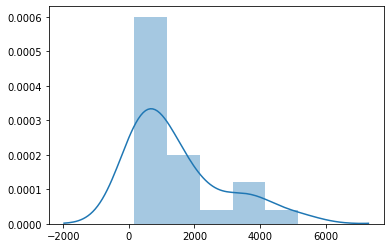

In [0]:
sns.distplot(sjc_las.iloc[:, 5:30].sum())

Looking at the columns in the fares table, we see columns representing price of tickets and the values reprensenting the count for a ticket at that price. 

It didn't seem to make much sense at first, but summing up a column shows how much is spent for tickets at that price level. For example, a ticket at $10 could have been a company/airline discount or promotion or purchased with mileage or heavily subsidized.

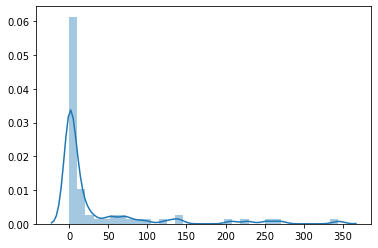

In [0]:
sns.distplot(sjc_las.iloc[:, 5:80].mean())

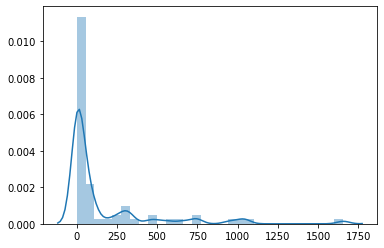

In [0]:
sns.distplot(sjc_las.iloc[:, 5:80].max())

In [0]:
# I'm thinking of writing some functions that given an event/time/nearest airport, we display table and visualization

## Event 3: New York Film Festival

**Date**: September 28 - October 15, 2017

**Location**: NYC 

New York Film Festival

## Event 4: US Open (Golf)

**Date**: September 28 - October 15, 2017

**Location**: Wisconsin, Erin (MKE closest airport)

US Open (Golf)

In [0]:
target_events = events[(events["event_name"] == "US Open (Golf)") | (events["event_name"] == "New York Film Festival") ]

In [0]:
#find destination airports
#NY: JFK
#WI: Major airport MKE, Madison MSN?
#NY: Filter time frame starting 03/01/17 till 10/31/17
#WI: Filter time frame starting 01/01/17 till 6/30/17

NY_flights = flight[flight["destination_airport"]=="JFK"]
WI_flights = flight[(flight["destination_airport"]=="MKE")]
NY_results = NY_flights[NY_flights["year"] == 2017]
NY_results = NY_results[(NY_results["month"] > 2 ) & (NY_results["month"] < 11)]
WI_results = WI_flights[(WI_flights["year"] == 2017)]
WI_results = WI_results[WI_results["month"] < 7]


In [0]:
#see the number of origins for NY flights
#Number of distinct origins
NY_origin = NY_results["origin_airport"].value_counts()
len(NY_origin)
NY_origin.head()

LAX    861
SFO    567
MCO    383
BOS    321
LAS    270
Name: origin_airport, dtype: int64

In [0]:
NY_fare = fares[fares["destination_airport"] == "JFK"]
WI_fare = fares[fares["destination_airport"] == "MKE"]
#for NY event, I might want quarter 2 and 3
#for WI, I want quarter 1 and 2
NY_fare = NY_fare[(NY_fare["quarter"] == 2) |(NY_fare["quarter"] == 3) ]
WI_fare = WI_fare[(WI_fare["quarter"] == 1) | (WI_fare["quarter"] == 2)]
#Group by quarter nyq2 and nyq3, wiq1 and wiq2
nyq2 = NY_fare[NY_fare["quarter"] == 2]
nyq3 = NY_fare[NY_fare["quarter"] == 3]
wiq1 = WI_fare[WI_fare["quarter"] == 1]
wiq2 = WI_fare[WI_fare["quarter"] == 2]
nyq2bin = nyq2.iloc[:,5:]
nyq3bin = nyq3.iloc[:,5:]
wiq1bin = wiq1.iloc[:,5:]
wiq2bin = wiq2.iloc[:,5:]

In [0]:
#LAX seems to be the most popular origin for NY trips, let's take a look at Q1 trips from LA
lax_ny_q2_bin = nyq2[nyq2["origin_airport"] == "LAX"].iloc[:,5:]
lax_ny_q2_bin

,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
20287,223,12,19,157,2,14,12,32,12,16,15,58,71,66,135,230,157,82,169,275,119,128,141,175,499,308,179,177,102,165,232,239,195,138,226,98,167,187,179,104,...,10,0,1,6,3,0,4,1,4,0,1,1,1,0,0,1,0,0,0,230,2,0,12,1,4,2,1,1,1,1,0,16,0,0,0,0,1,0,2,217
20317,121,45,31,18,2,178,22,75,10,13,10,35,26,65,82,12,56,131,96,157,87,236,144,159,130,210,164,118,154,171,406,104,92,444,149,96,85,62,87,109,...,0,0,3,3,0,3,0,1,0,4,0,0,0,1,4,1,2,3,1,0,1,1,0,1,0,1,2,0,0,0,1,1,0,0,0,0,0,0,0,323
21352,11,2,0,0,1,0,3,0,0,0,5,10,1,5,0,3,4,17,13,55,5,3,20,10,86,6,25,5,17,9,5,8,12,55,8,14,16,3,6,4,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
21746,36,8,1,3,9,1,5,1,3,44,62,120,8,11,13,30,67,23,29,72,41,40,114,442,119,53,165,52,85,61,54,89,60,112,55,215,76,42,37,46,...,0,0,0,0,0,0,0,0,2,5,0,2,0,0,0,4,0,0,9,1,2,0,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,91
22238,107,17,2,57,4,14,81,4,2,38,15,16,87,36,24,42,96,71,54,59,212,98,122,136,106,100,125,96,67,57,109,82,85,114,116,48,58,80,97,85,...,1,1,0,1,1,1,1,1,0,2,1,3,1,0,0,0,0,1,0,0,0,0,0,0,3,5,0,8,1,0,0,0,3,0,3,1,0,0,0,123
24498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,2,1,0,2,1,1,1,2,1,3,0,0,0,1,0,2,0,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
27514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import matplotlib.pyplot as plt
lax_ny_q2_sum = lax_ny_q2_bin.sum()
lax_ny_q2_sum

10      499
20       84
30       53
40      235
50       18
       ... 
2460      1
2470      1
2480      1
2490      2
2500    772
Length: 250, dtype: int64

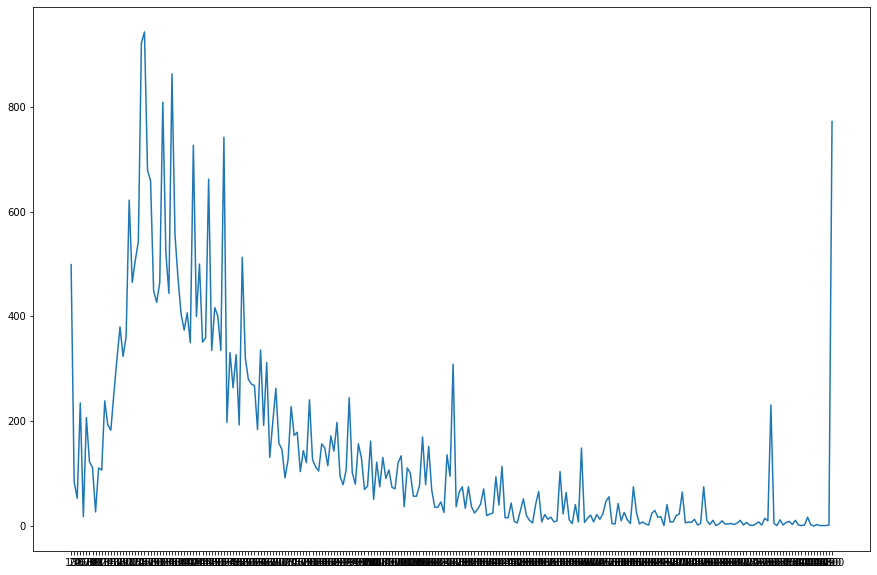

In [0]:
plt.figure(figsize = (15,10))
plt.plot(lax_ny_q2_bin.columns,lax_ny_q2_sum)

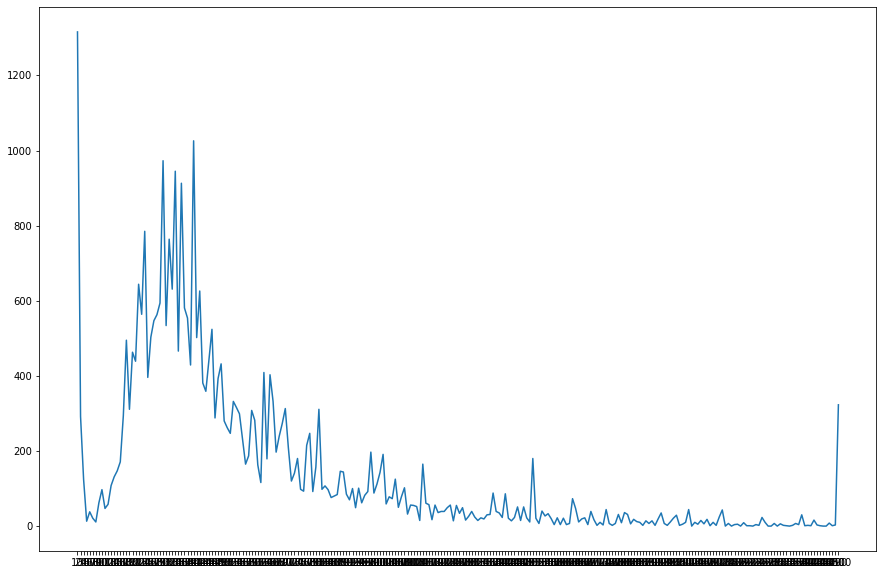

In [0]:
lax_ny_q3_bin = nyq3[nyq3["origin_airport"] == "LAX"].iloc[:,5:]
plt.figure(figsize = (15,10))
lax_ny_q3_sum = lax_ny_q3_bin.sum()
plt.plot(lax_ny_q3_bin.columns,lax_ny_q3_sum)
#looks similar to q2

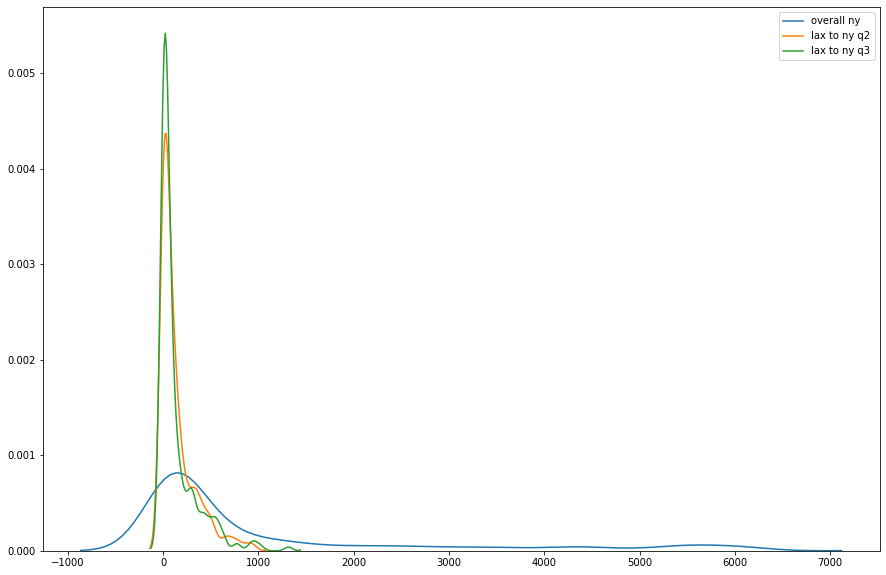

In [0]:
#There are peaks on both extreme ends, with majority in the hundred's bins
#kde plot to see smoother distribution, compare with overall flight fare distribution from any origin to NYC
plt.figure(figsize = (15,10))
sns.kdeplot(nyq2bin.sum(), label="overall ny")
sns.kdeplot(lax_ny_q2_sum, label ="lax to ny q2")
sns.kdeplot(lax_ny_q3_sum, label ="lax to ny q3")
plt.legend()

KDE plots all have area under 1, so above plot does not reflect specific distribution discrepancy among the labels but we can see LAX has much more density concentrated at the popular bins. Q3 even has sharper peak than Q2

In [0]:
airlines.head()

,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.
2,UA,United Airlines Inc.
3,WN,Southwest Airlines Co.
4,HA,Hawaiian Airlines Inc.


**New research question**

Now, to refocus our research question again to look at four airlines:
1. American Airline (AA)
2. Southwest (SW)
3. United Airline (UA)
4. Delta (DL)

Question: 
For a given airline, what are the top profitable routes?


**4. Delta (DL)**

In [0]:
quarter = []
for i in flight['month']:
  if i <= 3:
    quarter.append(1)
  elif i <= 6:
    quarter.append(2)
  elif i <= 9:
    quarter.append(3)
  else:
    quarter.append(4)
flight['quarter'] = quarter 

flight['flight_route'] = flight['origin_airport'] + ' --> ' + flight['destination_airport']
delta_flights = flight[flight["airline_id"] == "DL"]
delta_flights.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,quarter,flight_route
2033,2017,1,1,DL,ATL,SLC,1759,1802.0,14.0,1816.0,1952.0,23.0,2016,2015.0,0,0,257.0,253.0,1590,NaN,NaN,NaN,NaN,NaN,1,ATL --> SLC
2034,2017,1,1,DL,JFK,SLC,1600,1603.0,20.0,1623.0,1904.0,7.0,1934,1911.0,0,0,334.0,308.0,1990,NaN,NaN,NaN,NaN,NaN,1,JFK --> SLC
2035,2017,1,1,DL,LAX,ATL,900,915.0,15.0,930.0,1604.0,7.0,1614,1611.0,0,0,254.0,236.0,1946,NaN,NaN,NaN,NaN,NaN,1,LAX --> ATL
2036,2017,1,1,DL,LAX,ATL,1230,1242.0,12.0,1254.0,1933.0,12.0,1948,1945.0,0,0,258.0,243.0,1946,NaN,NaN,NaN,NaN,NaN,1,LAX --> ATL
2037,2017,1,1,DL,IAH,ATL,1405,1400.0,12.0,1412.0,1640.0,13.0,1709,1653.0,0,0,124.0,113.0,689,NaN,NaN,NaN,NaN,NaN,1,IAH --> ATL


In [0]:
most_common_dl = delta_flights.groupby("flight_route").count().iloc[ :, 1].to_frame().sort_values("month", ascending = False).rename(columns = {"month" : "count"}).reset_index()
most_common_dl.head()

,flight_route,count
0,MCO --> ATL,600
1,ATL --> LGA,596
2,ATL --> MCO,567
3,LGA --> ATL,566
4,ATL --> FLL,513


Text(0.5, 1.0, 'Top 5 Delta Flights')

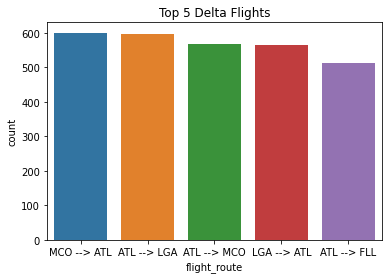

In [0]:
sns.barplot(x = "flight_route" , y = "count", data = most_common_dl.iloc[0:5 ,])
plt.title("Top 5 Delta Flights")

In [0]:
def plot_freq_flights(n):
  """ Plots the top n Delta flight routes in terms of frequency"""
  sns.barplot(x = "flight_route" , y = "count", data = most_common_dl.iloc[0:n ,])
  plt.title("Top " + str(n) + " Delta Flights")
  print("The top " + str(n) + " flights routes are: " + "\n" + str(most_common_dl.iloc[0:n , 0]))

The top 10 flights routes are: 
0    MCO --> ATL
1    ATL --> LGA
2    ATL --> MCO
3    LGA --> ATL
4    ATL --> FLL
5    ATL --> TPA
6    FLL --> ATL
7    ATL --> JAX
8    TPA --> ATL
9    JAX --> ATL
Name: flight_route, dtype: object


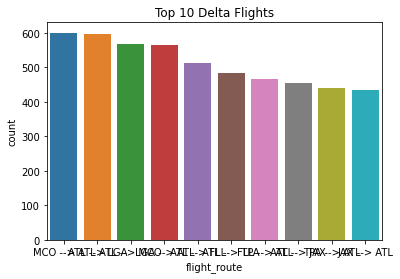

In [0]:
plot_freq_flights(10)

In [0]:
fares['flight_route'] = fares['origin_airport'] + ' --> ' + fares['destination_airport']
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,flight_route
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CLT --> SGF
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,DTW --> SAN
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MSP --> ISN
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CLT --> RDU
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ATL --> RIC


In [0]:
delta_fares = fares[fares["airline_id"] == "DL"]
delta_fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,flight_route
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,DTW --> SAN
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MSP --> ISN
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ATL --> RIC
9,1,DL,LGA,MCO,950,7,7,24,38,242,221,122,233,307,209,214,193,255,275,166,142,299,327,136,163,103,104,87,70,68,70,82,118,107,139,39,74,97,28,72,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,LGA --> MCO
10,1,DL,MSP,BOI,1142,7,11,8,6,19,23,20,32,42,32,37,49,45,28,35,29,42,27,34,24,33,25,35,30,23,24,19,25,15,10,20,19,17,16,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,MSP --> BOI


In [0]:
bins_df = delta_fares.iloc[5,5:250].drop(columns = "flight_route").reset_index()
temp = bins_df.reset_index()
delta_fares["revenue"] = temp["index"].astype(np.float) * temp[17]
delta_fares.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,flight_route,revenue
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,DTW --> SAN,5740
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MSP --> ISN,18120
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ATL --> RIC,75250
9,1,DL,LGA,MCO,950,7,7,24,38,242,221,122,233,307,209,214,193,255,275,166,142,299,327,136,163,103,104,87,70,68,70,82,118,107,139,39,74,97,28,72,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,LGA --> MCO,81300
10,1,DL,MSP,BOI,1142,7,11,8,6,19,23,20,32,42,32,37,49,45,28,35,29,42,27,34,24,33,25,35,30,23,24,19,25,15,10,20,19,17,16,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,MSP --> BOI,85800


In [0]:
rev = delta_fares.sort_values("revenue", ascending = False).iloc[:,[2,3,4,255,256]]
rev.head()

,origin_airport,destination_airport,distance,flight_route,revenue
10,MSP,BOI,1142,MSP --> BOI,85800
9,LGA,MCO,950,LGA --> MCO,81300
17,ATL,FLL,581,ATL --> FLL,80640
4,ATL,RIC,481,ATL --> RIC,75250
18,ATL,MSP,907,ATL --> MSP,72010


In [0]:
most_rev = rev.iloc[:,[3,4]]
most_rev.head()

,flight_route,revenue
10,MSP --> BOI,85800
9,LGA --> MCO,81300
17,ATL --> FLL,80640
4,ATL --> RIC,75250
18,ATL --> MSP,72010


Text(0.5, 1.0, 'Top 5 Delta Flights based on revenue')

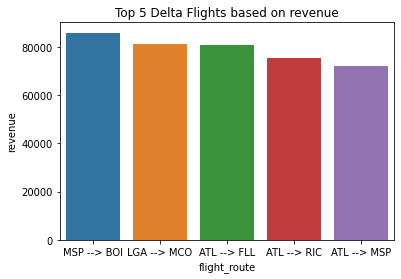

In [0]:
sns.barplot(x = "flight_route" , y = "revenue", data = most_rev.iloc[0:5 ,])
plt.title("Top 5 Delta Flights based on revenue")

In [0]:
def plot_profitable_flights(n):
  """ Plots the top n Delta flight routes in terms of revenue"""
  sns.barplot(x = "flight_route" , y = "revenue", data = most_rev.iloc[0:n ,])
  plt.title("Top " + str(n) +" Delta Flights based on revenue")
  print("The top " + str(n) + " flights routes by revenue are: " + "\n" + str(most_rev.iloc[0:n , 0]))

The top 10 flights routes by revenue are: 
10    MSP --> BOI
9     LGA --> MCO
17    ATL --> FLL
4     ATL --> RIC
18    ATL --> MSP
20    ATL --> RSW
25    ATL --> SRQ
30    MSP --> MSN
31    DTW --> ALB
29    DTW --> TPA
Name: flight_route, dtype: object


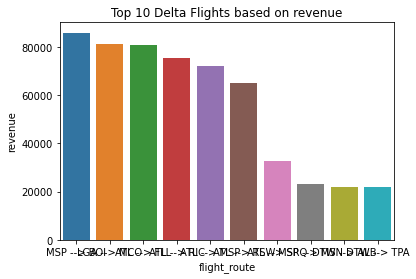

In [0]:
plot_profitable_flights(10)

Text(0.5, 1.0, 'Distance of top revenue flight routes')

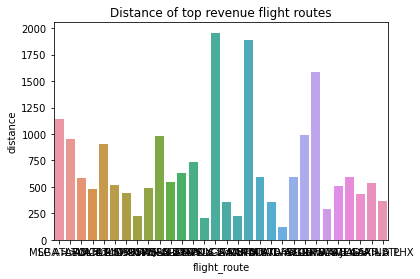

In [0]:
dist_by_rev = rev.iloc[:,[2,3]]
sns.barplot(x = "flight_route" , y = "distance", data = dist_by_rev.iloc[0:30 ,])
plt.title("Distance of top revenue flight routes")

In [0]:
prices = fares.iloc[:,5:250]
prices.head()
len(prices)

80823

In [0]:
price_bins = np.asarray(fares.iloc[:,5:250].columns).astype(np.int)
row_rev = np.array([])
for index, row in prices.iterrows():
  row_rev = np.append(row_rev,sum(np.asarray(row).astype(np.int) * price_bins))
len(row_rev)

80823

In [0]:
fares["route_revenue"] = row_rev
routes_fare = fares[["quarter","airline_id","distance","route_revenue","flight_route"]]
routes_fare.head()

,quarter,airline_id,distance,route_revenue,flight_route
0,1,AA,708,98510.0,CLT --> SGF
1,1,DL,1956,971350.0,DTW --> SAN
2,1,DL,546,74660.0,MSP --> ISN
3,1,AA,130,183630.0,CLT --> RDU
4,1,DL,481,910770.0,ATL --> RIC


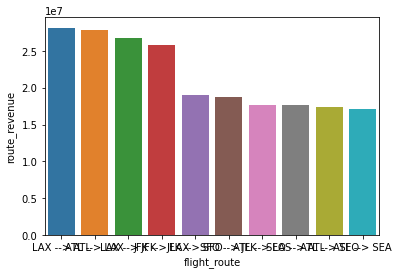

In [0]:
fares["route_revenue"] = row_rev
routes_fare = fares[["quarter","airline_id","distance","route_revenue","flight_route"]]
dl_routes_fare = routes_fare[routes_fare["airline_id"]=="DL"]
dl_routes_fare.sort_values("route_revenue",ascending=False).head(10)
dl_routes_fare_overall = dl_routes_fare[["flight_route","route_revenue"]].groupby("flight_route").sum().reset_index()
dl_routes_rev_sorted = dl_routes_fare_overall.sort_values("route_revenue",ascending=False).head(10)
sns.barplot(x = "flight_route" , y = "route_revenue", data = dl_routes_rev_sorted)

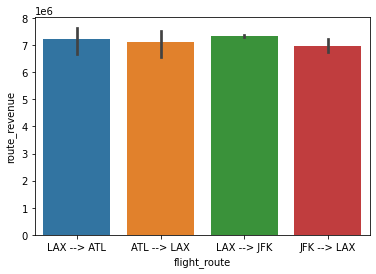

In [0]:
top_routes_with_quarter = dl_routes_fare.sort_values("route_revenue",ascending=False).head(10)
sns.barplot(x = "flight_route" , y = "route_revenue", data = top_routes_with_quarter)
# since we did not combine quarter some routes are duplicates, only 4 bars

In [0]:
flight.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,quarter,flight_route
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,1829.0,7.0,1856,1836.0,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN,1,CLT --> PHX
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,1456.0,9.0,1508,1505.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN,1,FLL --> CLT
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,1455.0,7.0,1508,1502.0,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN,1,FLL --> CLT
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,1508.0,5.0,1508,1513.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN,1,FLL --> CLT
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,1449.0,8.0,1508,1457.0,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN,1,FLL --> CLT


In [0]:
grouped_route = flight[["airline_id","quarter","flight_route"]].groupby(["airline_id","quarter","flight_route"]).agg(len).reset_index().rename(columns={0:"flight_counts"})
grouped_route

,airline_id,quarter,flight_route,flight_counts
0,AA,1,ABQ --> DFW,38
1,AA,1,ALB --> CLT,17
2,AA,1,AMA --> DFW,5
3,AA,1,ATL --> CLT,69
4,AA,1,ATL --> DFW,58
...,...,...,...,...
26520,WN,4,TUS --> LAS,24
26521,WN,4,TUS --> LAX,29
26522,WN,4,TUS --> MDW,8
26523,WN,4,TUS --> OAK,2


In [0]:

dl_routes = grouped_route[grouped_route["airline_id"]=="DL"]
dl_routes.head()

,airline_id,quarter,flight_route,flight_counts
5116,DL,1,ABE --> ATL,8
5117,DL,1,ABQ --> ATL,14
5118,DL,1,ABQ --> SLC,13
5119,DL,1,AGS --> ATL,14
5120,DL,1,ALB --> ATL,27


In [0]:
freq_flights = dl_routes.sort_values("flight_counts", ascending=False).groupby(["flight_route"]).sum().sort_values("flight_counts", ascending=False).reset_index().iloc[:,[0,2]]
freq_flights.head()

,flight_route,flight_counts
0,MCO --> ATL,600
1,ATL --> LGA,596
2,ATL --> MCO,567
3,LGA --> ATL,566
4,ATL --> FLL,513


Text(0.5, 1.0, 'Top 10 most popular Delta Flights')

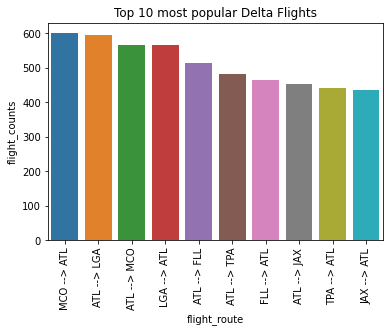

In [0]:
sns.barplot(x = "flight_route", y = "flight_counts", data = freq_flights.iloc[0:10, :])
plt.xticks(rotation=90) 
plt.title("Top 10 most popular Delta Flights")


In [0]:
def revenue_by_route(airline_id):
  """Given an airline, returns a dataframe sorted by revenue"""
  grouped_route = flight[["airline_id","quarter","flight_route"]].groupby(["airline_id","quarter","flight_route"]).agg(len).reset_index().rename(columns={0:"flight_counts"})
  airline_routes = grouped_route[grouped_route["airline_id"]==airline_id]
  fares["route_revenue"] = row_rev
  routes_fare = fares[["quarter","airline_id","distance","route_revenue","flight_route"]]
  airline_routes_fare = routes_fare[routes_fare["airline_id"] == airline_id]
  airline_routes_fare.sort_values("route_revenue",ascending=False).head(10)
  route_rev = airline_routes.merge(airline_routes_fare[["flight_route","quarter","distance","route_revenue"]],on = ["quarter","flight_route"],how="inner")
  new_by_route_rev = route_rev.groupby("flight_route").sum().reset_index().sort_values("route_revenue", ascending=False).iloc[:, [0, 2,3,4]]
  return new_by_route_rev

In [0]:
revenue_by_route("DL")
revenue_by_route("WN")
revenue_by_route("AA")
revenue_by_route("UA")

,flight_route,flight_counts,distance,route_revenue
653,SFO --> EWR,515,10260,39765500.0
233,EWR --> SFO,487,10260,38688870.0
395,LAX --> EWR,396,9816,31392100.0
673,SFO --> ORD,439,7384,30234150.0
211,EWR --> LAX,406,9816,29798430.0
...,...,...,...,...
450,MSN --> SFO,1,1772,10120.0
464,MTJ --> EWR,1,1795,4480.0
630,SDF --> LAX,1,1843,4030.0
408,LAX --> SDF,1,1843,2670.0


In [0]:
#above is using a single fare table, below I join with flight table since fare and flight are not 1-1 corresponding
routes_rev_count_quarter_dl = dl_routes.merge(dl_routes_fare[["flight_route","quarter","distance","route_revenue"]],on = ["quarter","flight_route"],how="inner")
routes_rev_count_quarter_dl.head()

,airline_id,quarter,flight_route,flight_counts,distance,route_revenue
0,DL,1,ABE --> ATL,8,692,209600.0
1,DL,1,ABQ --> ATL,14,1269,571580.0
2,DL,1,ABQ --> SLC,13,493,179170.0
3,DL,1,AGS --> ATL,14,143,110410.0
4,DL,1,ALB --> ATL,27,853,461080.0


In [0]:
routes_rev_count_quarter_dl.groupby("flight_route").sum().reset_index().sort_values("route_revenue", ascending=False).iloc[:, [0, 2,3,4]]


,flight_route,flight_counts,distance,route_revenue
476,LAX --> ATL,391,7788,28143260.0
83,ATL --> LAX,415,7788,27822660.0
490,LAX --> JFK,313,9900,26726110.0
444,JFK --> LAX,323,9900,25783010.0
457,JFK --> SFO,263,10344,19078850.0
...,...,...,...,...
191,BOS --> MIA,1,1258,9870.0
750,RSW --> IND,2,945,9600.0
195,BOS --> SDF,1,829,2740.0
535,MCI --> LAS,1,1139,2520.0


In [0]:
routes_rev_count_quarter_dl.sort_values("route_revenue", ascending=False)
routes_rev_count_quarter_dl.sort_values("route_revenue", ascending=False)

,airline_id,quarter,flight_route,flight_counts,distance,route_revenue
2800,DL,4,LAX --> ATL,96,1947,7638170.0
861,DL,2,ATL --> LAX,107,1947,7510210.0
1197,DL,2,LAX --> ATL,110,1947,7417690.0
1207,DL,2,LAX --> JFK,84,2475,7375760.0
2813,DL,4,LAX --> JFK,75,2475,7309770.0
...,...,...,...,...,...,...
977,DL,2,BZN --> LGA,1,1894,8210.0
961,DL,2,BOS --> SDF,1,829,2740.0
462,DL,1,MCI --> LAS,1,1139,2520.0
347,DL,1,HNL --> SFO,1,2398,2380.0


In [0]:
delta_rev_routes = routes_rev_count_quarter_dl.groupby("flight_route").sum().sort_values("flight_counts", ascending=False)
most_freq = delta_rev_routes.head(10).reset_index()
most_freq

,flight_route,quarter,flight_counts,distance,route_revenue
0,MCO --> ATL,10,600,1616,8109600.0
1,ATL --> LGA,10,596,3048,12073440.0
2,ATL --> MCO,10,567,1616,7958690.0
3,LGA --> ATL,10,566,3048,12052600.0
4,ATL --> FLL,10,513,2324,9785580.0
5,ATL --> TPA,10,483,1624,6227440.0
6,FLL --> ATL,10,465,2324,9895210.0
7,ATL --> JAX,10,454,1080,3348590.0
8,TPA --> ATL,10,440,1624,6394570.0
9,JAX --> ATL,10,435,1080,3481200.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

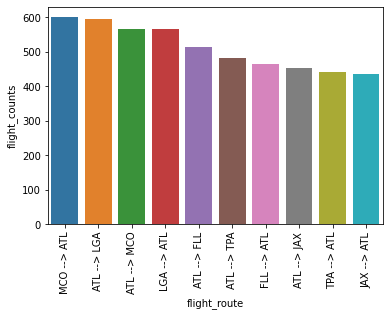

In [0]:
sns.barplot(x = "flight_route", y = "flight_counts", data = most_freq)
plt.xticks(rotation=90) 

In [0]:
most_profit = routes_rev_count_quarter_dl.groupby("flight_route").sum().sort_values("route_revenue", ascending = False).reset_index()
most_profit.head()

,flight_route,quarter,flight_counts,distance,route_revenue
0,LAX --> ATL,10,391,7788,28143260.0
1,ATL --> LAX,10,415,7788,27822660.0
2,LAX --> JFK,10,313,9900,26726110.0
3,JFK --> LAX,10,323,9900,25783010.0
4,JFK --> SFO,10,263,10344,19078850.0


In [0]:
most_freq = routes_rev_count_quarter_dl.groupby("flight_route").sum().sort_values("flight_counts", ascending = False).reset_index()
most_freq.head()

,flight_route,quarter,flight_counts,distance,route_revenue
0,MCO --> ATL,10,600,1616,8109600.0
1,ATL --> LGA,10,596,3048,12073440.0
2,ATL --> MCO,10,567,1616,7958690.0
3,LGA --> ATL,10,566,3048,12052600.0
4,ATL --> FLL,10,513,2324,9785580.0


Text(0.5, 1.0, 'Top 5 most profitable Delta Flights')

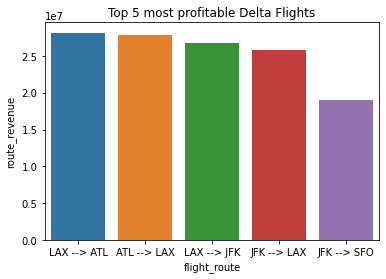

In [0]:
sns.barplot(x = "flight_route", y = "route_revenue", data = most_profit.iloc[0:5, :])
plt.title("Top 5 most profitable Delta Flights")


In [0]:
top_rev_dist = routes_rev_count_quarter_dl.groupby(["flight_route", "distance"]).sum().sort_values("route_revenue", ascending = False).reset_index()
top_rev_dist.head(10)

,flight_route,distance,quarter,flight_counts,route_revenue
0,LAX --> ATL,1947,10,391,28143260.0
1,ATL --> LAX,1947,10,415,27822660.0
2,LAX --> JFK,2475,10,313,26726110.0
3,JFK --> LAX,2475,10,323,25783010.0
4,JFK --> SFO,2586,10,263,19078850.0
5,SFO --> JFK,2586,10,255,18682450.0
6,ATL --> LAS,1747,10,221,17691020.0
7,SFO --> ATL,2139,10,231,17647320.0
8,ATL --> SFO,2139,10,249,17328290.0
9,ATL --> SEA,2182,10,243,17175550.0


In [0]:
top_rev_dist["distance"].mean()

1032.499455930359

Text(0.5, 1.0, 'Distances of top 30 profitable flights')

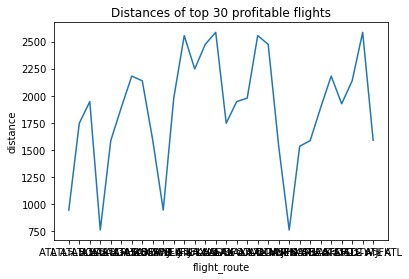

In [0]:
sns.lineplot(x = "flight_route", y = "distance", data = top_rev_dist.iloc[:30,])
plt.title("Distances of top 30 profitable flights")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

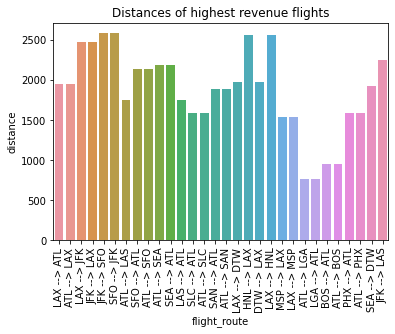

In [0]:
sns.barplot(x = "flight_route", y = "distance", data = top_rev_dist.iloc[:30,])
plt.title("Distances of highest revenue flights")
plt.xticks(rotation=90) 

In [0]:
routes_rev_count_quarter_dl.sort_values("route_revenue", ascending=False).head(10)

,airline_id,quarter,flight_route,flight_counts,distance,route_revenue
2800,DL,4,LAX --> ATL,96,1947,7638170.0
861,DL,2,ATL --> LAX,107,1947,7510210.0
1197,DL,2,LAX --> ATL,110,1947,7417690.0
1207,DL,2,LAX --> JFK,84,2475,7375760.0
2813,DL,4,LAX --> JFK,75,2475,7309770.0
2772,DL,4,JFK --> LAX,83,2475,7225960.0
2453,DL,4,ATL --> LAX,95,1947,7213490.0
1169,DL,2,JFK --> LAX,97,2475,6737190.0
1999,DL,3,LAX --> ATL,91,1947,6654260.0
74,DL,1,ATL --> LAX,90,1947,6566790.0


In [0]:
sns.barplot(x = "flight_route", y = "route_revenue", data = delta_rev_routes.iloc[0:17,])
plt.title("Top 5 Delta Flights based on revenue")


ValueError: ignored

In [0]:
routes_rev_count_quarter_dl.sort_values("flight_counts", ascending=False)
    


,airline_id,quarter,flight_route,flight_counts,distance,route_revenue
1251,DL,2,MCO --> ATL,160,404,2054140.0
1229,DL,2,LGA --> ATL,160,762,3159320.0
867,DL,2,ATL --> MCO,160,404,2017080.0
864,DL,2,ATL --> LGA,158,762,3376030.0
2053,DL,3,MCO --> ATL,153,404,1881360.0
...,...,...,...,...,...,...
965,DL,2,BOS --> STT,1,1693,109720.0
2597,DL,4,CVG --> DTW,1,229,108530.0
244,DL,1,DFW --> LGA,1,1389,834970.0
184,DL,1,BUF --> MSP,1,735,50610.0


In [0]:
routes_rev_count_quarter_dl.groupby("flight_route").size()
#size = 4 means the route is in all 4 quarters

flight_route
ABE --> ATL    4
ABQ --> ATL    4
ABQ --> MSP    3
ABQ --> SLC    4
AGS --> ATL    4
              ..
TVC --> DTW    3
TVC --> MSP    1
TYS --> ATL    4
VPS --> ATL    4
XNA --> ATL    4
Length: 917, dtype: int64

In [0]:
most_freq = routes_rev_count_quarter_dl.groupby("flight_route").sum().sort_values("flight_counts", ascending = False).reset_index()
most_freq

,flight_route,quarter,flight_counts,distance,route_revenue
0,MCO --> ATL,10,600,1616,8109600.0
1,ATL --> LGA,10,596,3048,12073440.0
2,ATL --> MCO,10,567,1616,7958690.0
3,LGA --> ATL,10,566,3048,12052600.0
4,ATL --> FLL,10,513,2324,9785580.0
...,...,...,...,...,...
912,GSO --> DTW,1,1,460,79400.0
913,MSP --> RNO,3,1,1405,33250.0
914,RDU --> TPA,3,1,587,101600.0
915,SDF --> MSP,4,1,604,189940.0


In [0]:
most_freq.iloc[:10, ]["flight_counts"].mean()

511.9

In [0]:
most_freq.iloc[:10, ]["distance"].mean()

1938.4

In [0]:
most_freq.iloc[:10, ]["route_revenue"].mean()

7932692.0

The most frequent flights are not the flights that make most revenue. 

For the top 10 most frequent flights:

*   The average number of flights is about 512.
*   The average revenue is about $7,932,692.

However, 



In [0]:
most_profit = routes_rev_count_quarter_dl.groupby("flight_route").sum().sort_values("route_revenue", ascending = False).reset_index()
most_profit.head()

,flight_route,quarter,flight_counts,distance,route_revenue
0,LAX --> ATL,10,391,7788,28143260.0
1,ATL --> LAX,10,415,7788,27822660.0
2,LAX --> JFK,10,313,9900,26726110.0
3,JFK --> LAX,10,323,9900,25783010.0
4,JFK --> SFO,10,263,10344,19078850.0


In [0]:
most_profit.iloc[:10, ]["flight_counts"].mean()

290.4

In [0]:
most_profit.iloc[:10, ]["distance"].mean()
#I don't think we can do distance like this because I grouped and summed all distances.

8889.2

In [0]:
most_profit.iloc[:10, ]["route_revenue"].mean()

21607852.0

**Latest Updates 4/4/2020** 

Looking at revenue by route

In [0]:
def revenue_by_route(airline_id):
  """Given an airline id, returns a dataframe and visualization for top profitable routes"""
  grouped_route = flight[["airline_id","quarter","flight_route"]].groupby(["airline_id","quarter","flight_route"]).agg(len).reset_index().rename(columns={0:"flight_counts"})
  airline_routes = grouped_route[grouped_route["airline_id"]==airline_id]
  fares["route_revenue"] = row_rev
  routes_fare = fares[["quarter","airline_id","distance","route_revenue","flight_route"]]
  airline_routes_fare = routes_fare[routes_fare["airline_id"] == airline_id]
  airline_routes_fare.sort_values("route_revenue",ascending=False).head(10)
  route_rev = airline_routes.merge(airline_routes_fare[["flight_route","quarter","distance","route_revenue"]],on = ["quarter","flight_route"],how="inner")
  # new_by_route_rev = route_rev.groupby("flight_route").sum().reset_index().sort_values("route_revenue", ascending=False).iloc[:, [0, 2,3,4]]
  new_by_route_rev = route_rev.groupby("flight_route").sum().reset_index().sort_values("flight_counts", ascending=False).iloc[:, [0, 2,3,4]]
  # plot = sns.barplot(x = "flight_route" , y = "route_revenue", data = new_by_route_rev.iloc[:10, ])
  plt.xticks(rotation=90) 
  plot = sns.barplot(x = "flight_route" , y = "flight_counts", data = new_by_route_rev.iloc[:10, ])

  # plt.title("Top 10 most profitable routes for " + airline_id)
  plt.title("Top 10 most frequent routes for " + airline_id)

  return new_by_route_rev, plot

(     flight_route  flight_counts  distance  route_revenue
 515   HOU --> DAL            690       956      2997410.0
 301   DAL --> HOU            660       956      2961770.0
 177   BUR --> OAK            448      1300      3059610.0
 668   LAX --> OAK            441      1348      3312450.0
 923   OAK --> BUR            412      1300      2990590.0
 ...           ...            ...       ...            ...
 557   IAD --> LAS              1      2065        18280.0
 1090  PNS --> STL              1       598        11440.0
 613   LAS --> EWR              1      2227        60190.0
 88    AUS --> SNA              1      1209        52990.0
 1096  PVD --> PBI              1      1148        10820.0
 
 [1393 rows x 4 columns],
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6411159a90>)

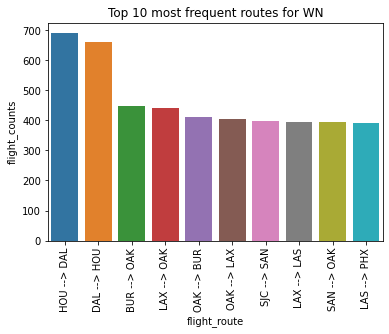

In [0]:
#revenue_by_route("DL")
revenue_by_route("WN")
#revenue_by_route("AA")
# revenue_by_route("UA")

In [0]:
# find round trips,aa_routes_fare is the table I used
# tripid = []
# for index, row in aa_routes_fare.iterrows():
#   if (row["origin_airport"] + " <-> " + row["destination_airport"] in tripid) or (row["destination_airport"] + " <-> " + row["origin_airport"] in tripid):
#     temp = ""
#     if row["origin_airport"] + " <-> " + row["destination_airport"] in tripid:
#       tripid.append(row["origin_airport"] + " <-> " + row["destination_airport"])
#     else:
#       tripid.append(row["destination_airport"] + " <-> " + row["origin_airport"])
#   else:
#     tripid.append(row["origin_airport"] + " <-> " + row["destination_airport"])
# aa_routes_fare["trip"] = tripid 
# aa_routes_fare.sort_values("distance",ascending = False)

#### Discrepancy in # of passengers 

In [0]:
def calc_discrepancy_passenger(airline_id, df):
  '''
  Inputs:  
    airline_id: two-letter id of an airline company. Ex. 'AA'
    df: data frame used for calculation - fares by route

  Outputs:
    df_discrepancy: data frame accounts for flight routes with 
    discrepancies in the number of passengers and discrepancies in revenue
  '''
  filtered_df = df[df['airline_id'] == airline_id].sort_values('revenue', ascending = False)
  temp = filtered_df
  merge = pd.merge(filtered_df, temp,  left_on = ['origin_airport', 'destination_airport'], right_on=['destination_airport',  'origin_airport'])
  merge['discrepancy_#passengers'] = merge['num_of_passengers_x'] - merge['num_of_passengers_y']
  discrepancy_df = merge.drop_duplicates(subset=['discrepancy_#passengers']).sort_values('discrepancy_#passengers', ascending = False)
  discrepancy_df['discrepancy_revenue'] = discrepancy_df['revenue_x'] - discrepancy_df['revenue_y']

  sns.lmplot(x = 'discrepancy_#passengers', y = 'discrepancy_revenue', data = discrepancy_df)
  ax = plt.gca()
  ax.set_title('Discrepancy # Passengers ' + '-- ' + airline_id);

  return discrepancy_df


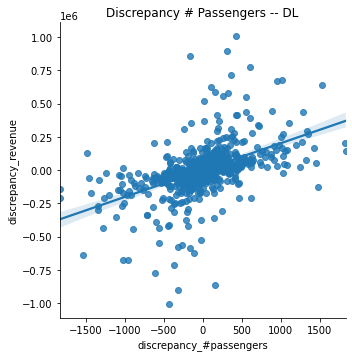

In [0]:
airline_id = 'DL'
df = calc_discrepancy_passenger(airline_id, fares_by_route)

### Discrepancy in average price/passenger vs revenue
#### Comparison among routes and within a route

In [0]:

num_ppl = np.array([])


for index, row in fares.iloc[:,5:250].iterrows():
  #row_rev = np.append(row_rev,sum(np.asarray(row).astype(np.int) * price_bins))
  num_ppl = np.append(num_ppl, sum(np.asarray(row).astype(np.int)))

num_ppl

array([6.110e+02, 2.204e+03, 5.940e+02, ..., 1.000e+00, 1.000e+00,
       1.000e+00])

In [0]:
fares["passenger_counts"] = num_ppl

In [0]:
fares

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,flight_route,route_revenue,passenger_counts
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CLT --> SGF,98510.0,611.0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,DTW --> SAN,971350.0,2204.0
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MSP --> ISN,74660.0,594.0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CLT --> RDU,183630.0,6731.0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ATL --> RIC,910770.0,8282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80818,4,AA,STL,MSY,604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,STL --> MSY,400.0,1.0
80819,4,WN,SDF,ROC,544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SDF --> ROC,350.0,1.0
80820,4,WN,BDL,ONT,2482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BDL --> ONT,420.0,1.0
80821,4,WN,HRL,TUL,695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,HRL --> TUL,370.0,1.0


In [0]:
routes_fare = fares[["quarter","airline_id","origin_airport","destination_airport","distance","route_revenue","passenger_counts","flight_route"]]
def avg_price_vs_rev(airline_id):
  airline_fare = routes_fare[routes_fare["airline_id"] == airline_id]
  tripid = []
  for index, row in airline_fare.iterrows():
    if (row["origin_airport"] + " <-> " + row["destination_airport"] in tripid) or (row["destination_airport"] + " <-> " + row["origin_airport"] in tripid):
      temp = ""
      if row["origin_airport"] + " <-> " + row["destination_airport"] in tripid:
        tripid.append(row["origin_airport"] + " <-> " + row["destination_airport"])
      else:
        tripid.append(row["destination_airport"] + " <-> " + row["origin_airport"])
    else:
      tripid.append(row["origin_airport"] + " <-> " + row["destination_airport"])
  airline_fare["trip"] = tripid 
  routefare_by_trip = airline_fare[["route_revenue","distance","trip"]].groupby(["trip"]).agg({"distance":lambda x:x.iloc[0],"route_revenue":sum}).reset_index()
  top_rev_trips = routefare_by_trip.sort_values("route_revenue",ascending=False).head(15)["trip"]
  top_one_way_trip = airline_fare[airline_fare["trip"].isin(top_rev_trips)]
  top_trips_formatted = top_one_way_trip[["quarter", "route_revenue", "passenger_counts","flight_route","trip"]].groupby(["quarter","trip","flight_route"]).sum().reset_index()
  top_trips_formatted_by_trip = top_trips_formatted[["quarter","trip","route_revenue","passenger_counts"]].groupby(["quarter","trip"]).sum().reset_index()
  avg_price_round = top_trips_formatted_by_trip["route_revenue"]/top_trips_formatted_by_trip["passenger_counts"]
  top_trips_formatted["avg_price_per_seat_one_way"] = top_trips_formatted["route_revenue"]/top_trips_formatted["passenger_counts"]
  top_trips_formatted["avg_price_per_seat_round "] = np.asarray(np.repeat(avg_price_round,2))
  top_trips_formatted_combined_by_trip = top_trips_formatted[["trip","route_revenue","passenger_counts"]].groupby("trip").sum().reset_index()
  overall_avg_price_round = top_trips_formatted_combined_by_trip["route_revenue"]/top_trips_formatted_combined_by_trip["passenger_counts"]
  top_trips_formatted_combined = top_trips_formatted[["trip","flight_route","route_revenue","passenger_counts"]].groupby(["trip","flight_route"]).sum().reset_index()
  top_trips_formatted_combined["avg_price_per_seat_one_way"] = top_trips_formatted_combined["route_revenue"]/top_trips_formatted_combined["passenger_counts"]
  top_trips_formatted_combined["avg_price_per_seat_round"] = np.asarray(np.repeat(overall_avg_price_round,2))
  fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(15,9))
  for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=20)
  sns.barplot("trip","route_revenue",data=top_trips_formatted_combined.sort_values("route_revenue", ascending=False),ax=axes[0])
  sns.barplot("trip","avg_price_per_seat_round",data=top_trips_formatted_combined.sort_values("route_revenue", ascending=False),ax=axes[1])
  #sns.barplot("trip",column,data=top_trips_formatted_combined.sort_values(column, ascending=False),ax=axes[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


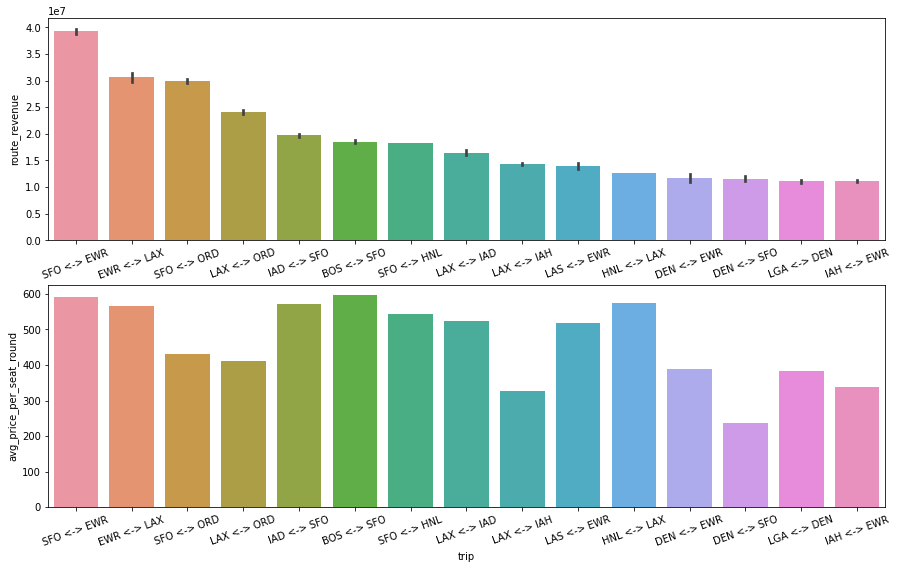

In [0]:
avg_price_vs_rev("UA")